# Table of Contents:
1. Introduction
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing

# 1. Introduction:

# 2. Exploratory Data Analysis (EDA):

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
import pandas as pd

real_estate_df = pd.read_csv("real_estate_dataset.csv")
real_estate_df.head()

,Property_type,Area,Width,Length,Frontage,Number_of_floors,Number_of_bedrooms,Number_of_toilets,Legal_status,Furniture,...,Access_road,Posting_date,Expiry_date,Type_of_listing,Project_name,Street,Ward,District,Province,Price
0,Nhà biệt thự,196.0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Không có nội thất,...,NaN,4/11/2023,11/11/2023,Tin VIP Kim Cương,Dự án Camellia Garden,Đường Nguyễn Văn Linh,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,18.0
1,Nhà biệt thự,196.0,NaN,NaN,10.0,1.0,3.0,3,Giấy tờ khác,Không có nội thất,...,10.0,4/11/2023,11/11/2023,Tin VIP Bạc,Dự án Camellia Garden,Đường Nguyễn Văn Linh,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,18.0
2,Nhà biệt thự,282.0,NaN,NaN,NaN,2.0,4.0,6,Đã có sổ,Có nội thất,...,16.0,1/11/2023,11/11/2023,Tin VIP Bạc,Unknown,Đường số 2,Xã Tân Kiên,Bình Chánh,TP Hồ Chí Minh,21.0
3,Nhà biệt thự,80.0,NaN,NaN,NaN,3.0,4.0,3,Đã có sổ,Có nội thất,...,NaN,1/11/2023,16/11/2023,Tin thường,Dự án Lovera Park,Đường Trịnh Quang Nghị,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,6.5
4,Nhà biệt thự,337.5,NaN,NaN,15.0,3.0,5.0,6,Đã có sổ,Có nội thất,...,18.0,31/10/2023,7/11/2023,Tin VIP Bạc,Dự án Đại Phúc Green Villas,Đường Phạm Hùng,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,38.0


In [68]:
# Check the effect of the null values on the dataset:
for column in real_estate_df.columns:
    unique_values = real_estate_df[column].unique()
    print(f"\033[1m{column}:\033[0m \n {unique_values}")

Property_type: 
 ['Nhà biệt thự' 'Nhà mặt phố' 'Nhà ngõ, hẻm' 'Nhà phố liền kề' 'Chung cư']
Area: 
 [196.   282.    80.   ...  62.13 105.95 111.9 ]
Width: 
 [     nan   4.       6.      22.       3.3      3.       3.6      3.8
   7.      12.5      8.5      4.5      4.2     49.       7.8      8.
  11.       5.      11.4      5.5      5.2      2.5      5.82    10.
   3.2      3.5      4.6      4.8     20.       5.4      4.4      5.8
   5.75    12.       5.7      3.4     36.       6.6      3.25     4.3
   4.1      5.16     6.2      3.1      9.5      9.       6.5      3.7
   3.9     13.       3.45     3.71    15.       7.2      8.02    10.5
   7.6     12.15     4.7      6.7      5.3      8.4      5.6      4.05
  14.5      5.1      5.13    16.4     14.       6.1      4.22    26.
  35.       4.02     4.12     3.92    28.      23.      41.      37.
  45.       8.2      9.8      4.25     2.8      4.36    11.5     83.
   7.3     55.       7.5      4.01    11.25     3.85   350.       6.8
  44.  

### Meaning of each field of information:

|No|Attribute name|Meaning 
|---|---|--- 
| 1|Property_type| Loại hình nhà ở, gồm: Nhà biệt thự; Nhà mặt phố; Nhà ngõ, hẻm; Nhà phố liền kề; Chung cư
| 2|Area| Diện tích của bất động sản (đơn vị: m²)
| 3|Width| Chiều rộng của ngôi nhà (đơn vị: m)
| 4|Length| Chiều dài của ngôi nhà (đơn vị: m)
| 5|Frontage| Độ dài mặt tiền của ngôi nhà (đơn vị: m)
| 6|Number_of_floors| Số tầng của nhà mặt đất
| 7|Number_of_bedrooms| Số phòng ngủ của bất động sản
| 8|Number_of_bathrooms| Số phòng tắm của bất động sản
| 9|Legal_status| Tình trạng pháp lý của bất động sản
|10|Furniture| Tình trạng nội thất của bất động sản
|11|House_orientation| Hướng nhà của bất động sản
|12|Balcony_orientation| Hướng ban công của bất động sản
|13|Access_road| Độ dài đường đi vào nhà mặt đất (đơn vị: m)
|14|Posting_date| Ngày đăng tin rao bán bất động sản
|15|Expiry_date| Ngày hết hạn tin rao bán bất động sản
|16|Type_of_listing| Loại tin rao bán bất động sản được đăng lên
|17|Project_name| Tên dự án của bất động sản
|18|Street| Tên Đường/Phố thuộc vị trí của bất động sản
|19|Ward| Tên Phường/Xã/Thị trấn thuộc vị trí của bất động sản
|20|District| Tên Quận/Huyện thuộc vị trí của bất động sản
|21|Province| Tên Tỉnh thành thuộc vị trí của bất động sản
|22|Price| Giá thành của bất động sản (đơn vị: tỷ)

**Observation:**
- Ta thấy cột `Province` chỉ có một giá trị duy nhất là `TP Hồ Chí Minh`, không có ý nghĩa trong dự đoán, vì thế ta sẽ loại bỏ cột này trong phần làm sạch dữ liệu.

In [69]:
rows, cols = real_estate_df.shape
print("rows: ", rows, "\ncols: ", cols)

rows:  57110 
cols:  22


In [70]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57110 entries, 0 to 57109
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property_type        57110 non-null  object 
 1   Area                 57110 non-null  float64
 2   Width                3504 non-null   float64
 3   Length               1819 non-null   float64
 4   Frontage             11466 non-null  float64
 5   Number_of_floors     26065 non-null  float64
 6   Number_of_bedrooms   46018 non-null  float64
 7   Number_of_toilets    40818 non-null  object 
 8   Legal_status         57110 non-null  object 
 9   Furniture            57110 non-null  object 
 10  House_orientation    13251 non-null  object 
 11  Balcony_orientation  7386 non-null   object 
 12  Access_road          10589 non-null  float64
 13  Posting_date         57110 non-null  object 
 14  Expiry_date          35443 non-null  object 
 15  Type_of_listing      35504 non-null 

**Observation:**
- Thuộc tính `Number_of_toilets` sai kiểu dữ liệu vì có giá trị *Nhiều hơn 6 phòng*. 
-> Tiến hành xử lý giá trị *Nhiều hơn 6 phòng* và đưa kiểu dữ liệu của thuộc tính `Number_of_toilets` từ object về float64.

- Thuộc tính `Price` cũng bị sai kiểu dữ liệu.

- Ta thấy nhiều thuộc tính có giá trị *Null*.

- Số lượng giá trị *Null* ở một số thuộc tính cũng khá nhiều.
-> Kiểm tra số lượng giá trị *Null* ở mỗi thuộc tính và đưa ra giải pháp.



In [8]:
# Xử lý cột Number_of_toilets và cột Price:
#real_estate_df['Number_of_bathrooms'].astype('float64')
#real_estate_df['Number_of_bathrooms'].dtype
#real_estate_df['Price'].astype('float64')
#print('Datatype of Price column: ', real_estate_df['Price'].dtype)

In [71]:
# Kiểm tra số giá trị Null ở các thuộc tính:
feature_cols = real_estate_df.columns
def display_null(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            print(f"{col} has {null_count*100/n_rows:.2f}% null values.")

display_null(real_estate_df, feature_cols)

Width has 93.86% null values.
Length has 96.81% null values.
Frontage has 79.92% null values.
Number_of_floors has 54.36% null values.
Number_of_bedrooms has 19.42% null values.
Number_of_toilets has 28.53% null values.
House_orientation has 76.80% null values.
Balcony_orientation has 87.07% null values.
Access_road has 81.46% null values.
Expiry_date has 37.94% null values.
Type_of_listing has 37.83% null values.
Project_name has 55.99% null values.
Street has 3.50% null values.


**Observation:**
- Các thuộc tính như `Width`, `Length`, `Frontage`, `Number_of_floors`, `Furniture`, `House_orientation`, `Balcony_orientation`, `Access_road`, `Project_name` có hơn một nửa là giá trị *Null*.

In [7]:
real_estate_df.describe()

,Area,Width,Length,Frontage,Number_of_floors,Number_of_bedrooms,Access_road,Price
count,57202.000000,3506.000000,1819.000000,11466.000000,26162.000000,46115.000000,10589.000000,57209.000000
mean,114.712745,5.472224,16.380572,7.018411,3.360370,3.469630,11.772368,16.809713
std,225.334187,7.531153,10.734064,12.357637,1.688756,4.655235,10.681282,41.808394
min,7.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.050000,0.010000
25%,59.000000,4.000000,12.000000,4.000000,2.000000,2.000000,6.000000,2.900000
50%,76.000000,4.100000,15.000000,5.000000,3.000000,3.000000,8.000000,6.000000
75%,112.000000,5.000000,19.000000,8.000000,4.000000,4.000000,14.000000,15.000000
max,18500.000000,350.000000,222.500000,980.000000,44.000000,200.000000,322.000000,1555.200000


**Observation:**
- Với cột `Area`, giá trị diện tích lớn nhất là 18500 (m²), nhưng có tới 75% giá trị diện tích là 112 (m²). Việc này chứng tỏ phân bố của dữ liệu này khá lệch (skewed).

- Tương tự với các cột còn lại.

In [8]:
real_estate_df.describe(include="O")

,Property_type,Number_of_toilets,Legal_status,Furniture,House_orientation,Balcony_orientation,Posting_date,Expiry_date,Type_of_listing,Project_name,Street,Ward,District,Province
count,57116,40916,57209,57209,13342,7386,57209,35443,35504,25138,55211,57209,57209,57209
unique,5,7,4,3,8,8,148,128,4,1237,5767,186,22,1
top,Chung cư,2,Đã có sổ,Không có nội thất,Đông Nam,Đông Nam,10/11/2023,23/11/2023,Tin thường,Unknown,Đường Huỳnh Tấn Phát,Phường 12,TP Thủ Đức,TP Hồ Chí Minh
freq,20409,18111,31389,36371,2723,1845,3981,2047,34505,13427,654,2156,10287,57209


**Observation:**
- Với cột `Legal_status`, có *23109* giá trị khác *Null* nhưng lại có đến *20575* giá trị là *Có nội thất*.

- Tương tự với các cột `Furniture`, `Type_of_listing`, `Province`.

In [12]:
# Tạo DataFrame tạm thời rỗng
temp_address = pd.DataFrame()

# Gán các cột từ DataFrame ban đầu vào DataFrame tạm thời
temp_address = temp_address.assign(Street=real_estate_df['Street'], Ward=real_estate_df['Ward'], District=real_estate_df['District'], Province=real_estate_df['Province'])

# Hàm tùy chỉnh để gộp các cột thành một chuỗi mới
def merge_columns(row):
    values = [str(row['Street']), str(row['Ward']), str(row['District']), str(row['Province'])]
    return ', '.join([value for value in values if value != 'nan'])

# Áp dụng hàm tùy chỉnh cho mỗi hàng và tạo cột mới
temp_address['Address'] = temp_address.apply(merge_columns, axis=1)

# In DataFrame kết quả
temp_address.head()

,Street,Ward,District,Province,Address
0,Đường Nguyễn Văn Linh,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,"Đường Nguyễn Văn Linh, Xã Bình Hưng, Bình Chán..."
1,Đường Nguyễn Văn Linh,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,"Đường Nguyễn Văn Linh, Xã Bình Hưng, Bình Chán..."
2,Đường số 2,Xã Tân Kiên,Bình Chánh,TP Hồ Chí Minh,"Đường số 2, Xã Tân Kiên, Bình Chánh, TP Hồ Chí..."
3,Đường Trịnh Quang Nghị,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,"Đường Trịnh Quang Nghị, Xã Phong Phú, Bình Chá..."
4,Đường Phạm Hùng,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,"Đường Phạm Hùng, Xã Bình Hưng, Bình Chánh, TP ..."


#### Calculate the distance to the Ben Thanh Market (Center of Ho Chi Minh City)

In [2]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

def get_lat_lon(address):
    geolocator = Nominatim(user_agent="https")
    try:
        location = geolocator.geocode(address)
    except:
        try:
            location = geolocator.geocode(address)
        except:
            location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    elif address == "Phường 15, Quận 5, TP Hồ Chí Minh":
        return [10.755628372856584, 106.65348173545244]
    else:
        return None
    
target_location = "Ben Thanh Tourist Market, Quach Thi Trang Square, Ben Thanh Ward, District 1, Ho Chi Minh City"
target_coordinates = get_lat_lon(target_location)

In [ ]:
def compute_distance(row, target_location):
    # Extract latitude and longitude from the row
    lat1, lon1 = row[0], row[1]
    
    # Compute the distance using geodesic function
    distance = geodesic((lat1, lon1), target_location).kilometers
    
    return distance

In [ ]:
#extract address from temp_address to list
list_address = temp_address["Address"].to_list()

# create list of distances
list_distance = [] 

# loop through list_address and compute the distance
for i in range(0, len(list_address)):
  coordinates = get_lat_lon(list_address[i]) # get latitude and longitude
  distance = compute_distance(coordinates, target_coordinates) # compute distance from coordinates to target coordinates
  list_distance.append(distance)

In [ ]:
dictions = {'Distance' : list_distance}
pd.DataFrame(dictions).to_csv('Distance.csv')

In [47]:
# Get categorical columns and numerical columns
#categorical_cols = [feature for feature in real_estate_df.columns if real_estate_df[feature].dtype == "object"]
#numerical_cols = [feature for feature in real_estate_df.columns if real_estate_df[feature].dtype != "object"]
#print('Categorical columns: ', categorical_cols)
#print('Numerical columns:', numerical_cols)

### Data Visualization:

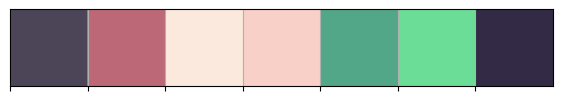

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Thiết lập cấu hình lưới cho toàn bộ biểu đồ
plt.rcParams.update({'axes.grid': True})

# Tạo danh sách các màu tùy chỉnh
custom_colors = ["#4C4557", "#BD6877", "#FAE9DC", "#F9D0C8", "#53A789", "#6BDD96", "#332B45"]

# Tạo palette từ danh sách màu tùy chỉnh
custom_palette = sns.color_palette(custom_colors)
sns.palplot(custom_palette)

# Chuyển đổi palette thành colormap
custom_cmap = ListedColormap(custom_palette)

In [10]:
# Tạo Dataframe mới cho việc phân tích dữ liệu
df = real_estate_df.copy()

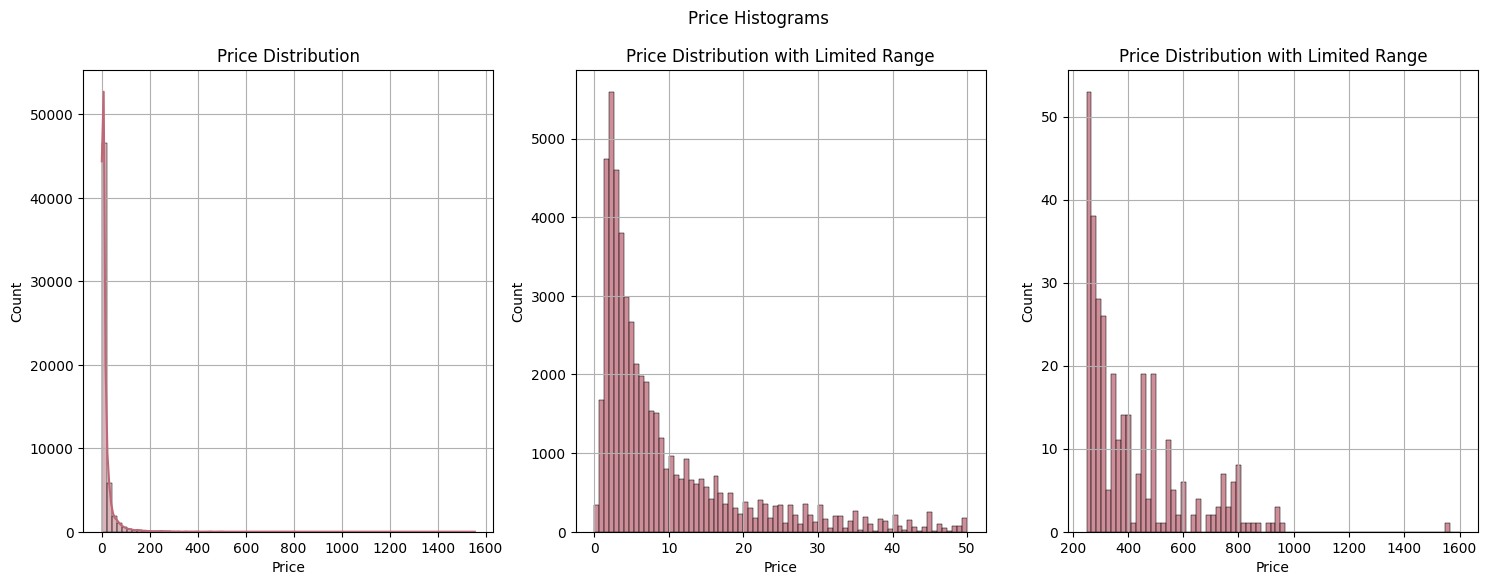

In [11]:
# Tạo lưới subplot với 1 hàng và 3 cột
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ biểu đồ thứ nhất trên subplot đầu tiên
sns.histplot(data=df, x="Price", kde=True, color="#BD6877", bins=75, ax=axes[0])
plt.grid(True)
axes[0].set_title("Price Distribution")

# Vẽ biểu đồ thứ hai trên subplot thứ hais
sns.histplot(data=df, x="Price", color="#BD6877", bins=75, binrange=[0, 50], ax=axes[1])
axes[1].set_title("Price Distribution with Limited Range")

# Vẽ biểu đồ thứ ba trên subplot thứ ba
sns.histplot(data=df, x="Price", color="#BD6877", bins=75, binrange=[250, 1600], ax=axes[2])
axes[2].set_title("Price Distribution with Limited Range")

# Cài đặt tiêu đề chung cho cả hình ảnh
plt.suptitle("Price Histograms")

# Hiển thị hình ảnh
plt.show()

**Observation:**
- Giá thành trải dài trong khoảng (0; 1600) tỷ VNĐ.

- Chủ yếu tập trung trong khoảng dưới 10 tỷ VNĐ, và có xu hướng giảm dần khi giá thành tăng.

- Ở biểu đồ thứ 3, ta có thể thấy có một số mức giá rất cao so với phần còn lại.

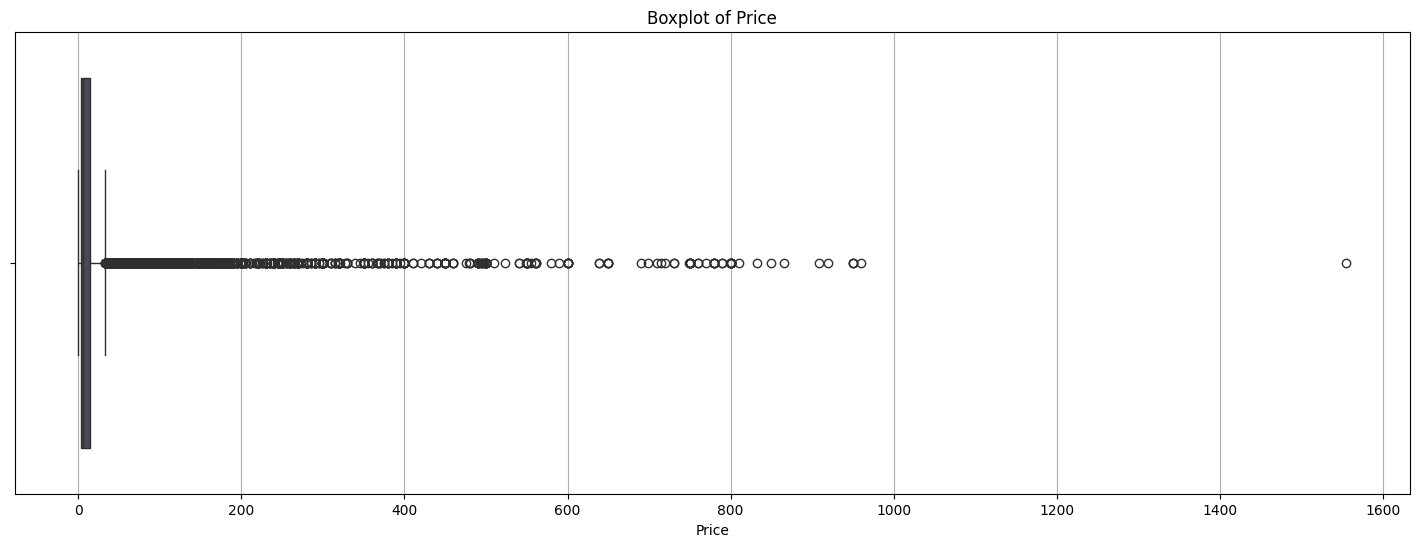

In [12]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df, x="Price", palette=custom_palette)
plt.title("Boxplot of Price")

plt.show()

**Observation:**
- Có nhiều giá trị ngoại lai của thuộc tính này.

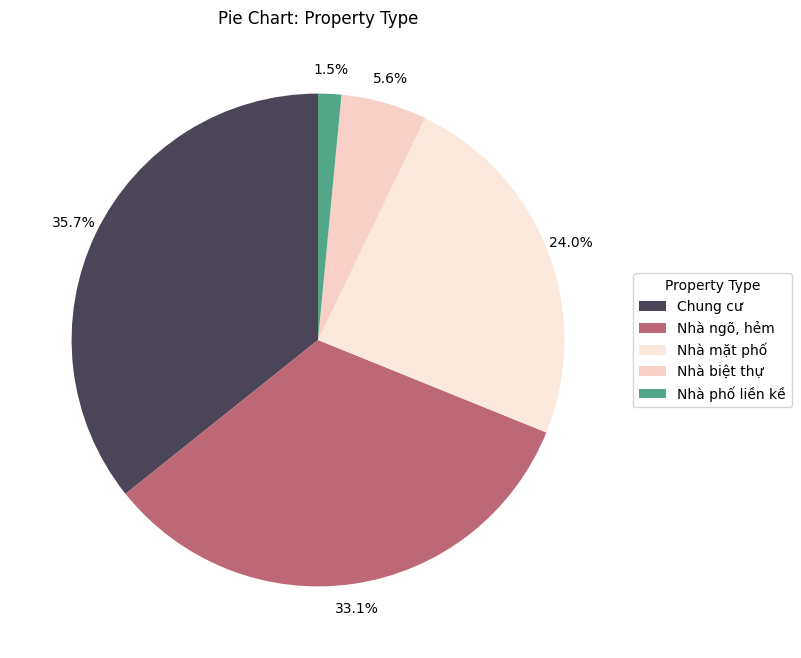

In [13]:
import matplotlib.dates as mdates

plt.figure(figsize=(8, 8))

# Tính số lượng mỗi nhóm
group_counts = df["Property_type"].value_counts()

# Vẽ biểu đồ tròn
wedges, text, autotext = plt.pie(group_counts, startangle=90, colors=custom_palette, autopct=lambda pct: f"{pct:.1f}%", pctdistance=1.1)

# Điều chỉnh kích thước font chữ trong chú thích
plt.setp(autotext, size=10)

# Đặt tiêu đề
plt.title("Pie Chart: Property Type")

# Hiển thị chú thích riêng
plt.legend(wedges, group_counts.index, title="Property Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Hiển thị biểu đồ
plt.show()

**Observation:**
- Các loại hình nhà ở chủ yếu là *Chung cư* và *Nhà ngõ, hẻm*.

- *Nhà phố liền kề* và *Nhà biệt thự* chiếm số lượng rất ít trong thuộc tính này.

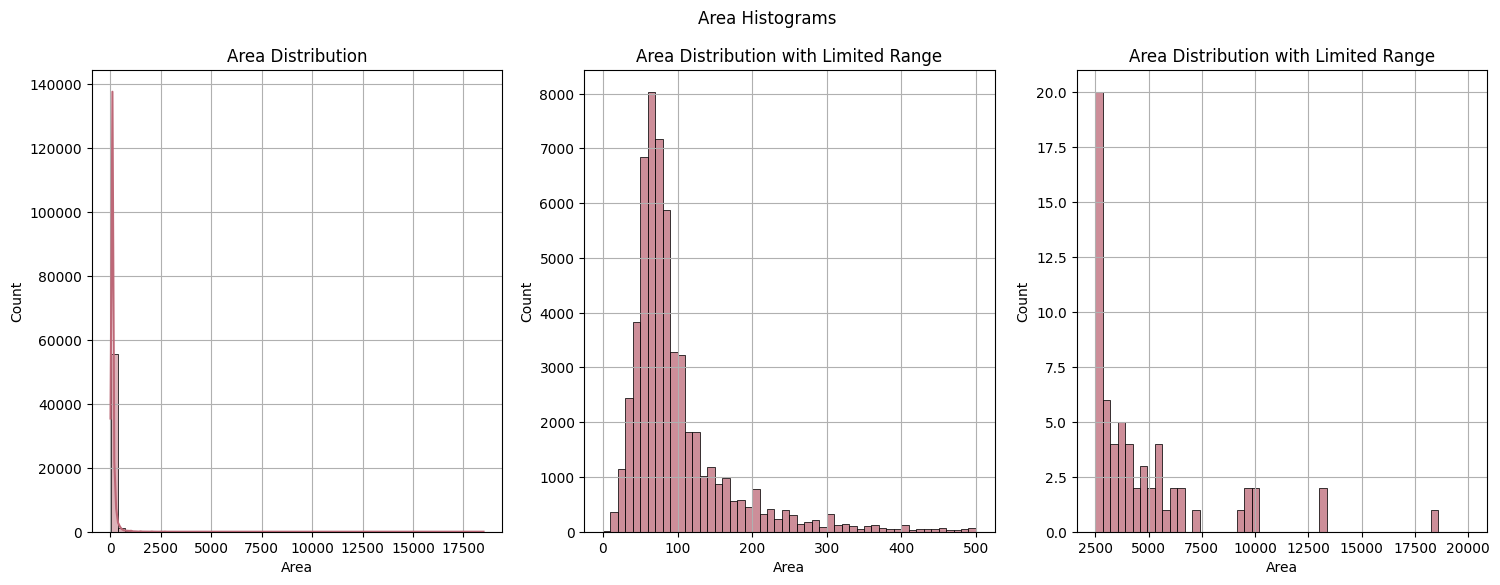

In [53]:
# Tạo lưới subplot với 1 hàng và 3 cột
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ biểu đồ thứ nhất trên subplot đầu tiên
sns.histplot(data=df, x="Area", kde=True, color="#BD6877", bins=50, ax=axes[0])
axes[0].set_title("Area Distribution")

# Vẽ biểu đồ thứ hai trên subplot thứ hai
sns.histplot(data=df, x="Area", color="#BD6877", bins=50, binrange=[0, 500], ax=axes[1])
axes[1].set_title("Area Distribution with Limited Range")

# Vẽ biểu đồ thứ ba trên subplot thứ ba
sns.histplot(data=df, x="Area", color="#BD6877", bins=50, binrange=[2500, 20000], ax=axes[2])
axes[2].set_title("Area Distribution with Limited Range")

# Cài đặt tiêu đề chung cho cả hình ảnh
plt.suptitle("Area Histograms")

# Hiển thị hình ảnh
plt.show()

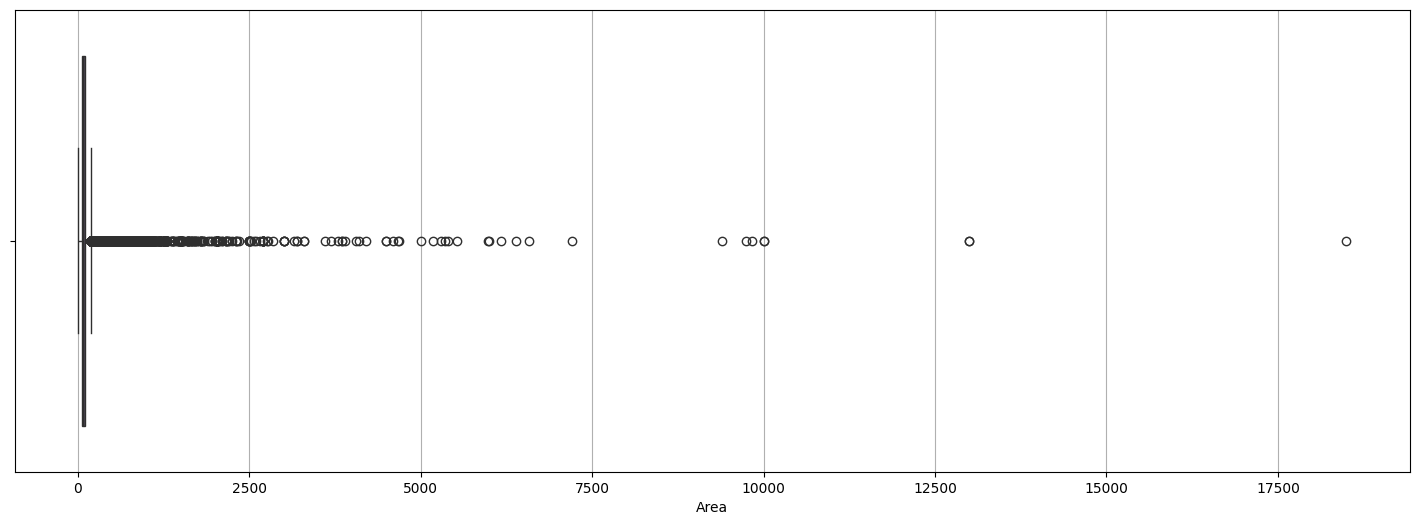

In [54]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df, x="Area", palette=custom_palette)

plt.show()

**Observation:**

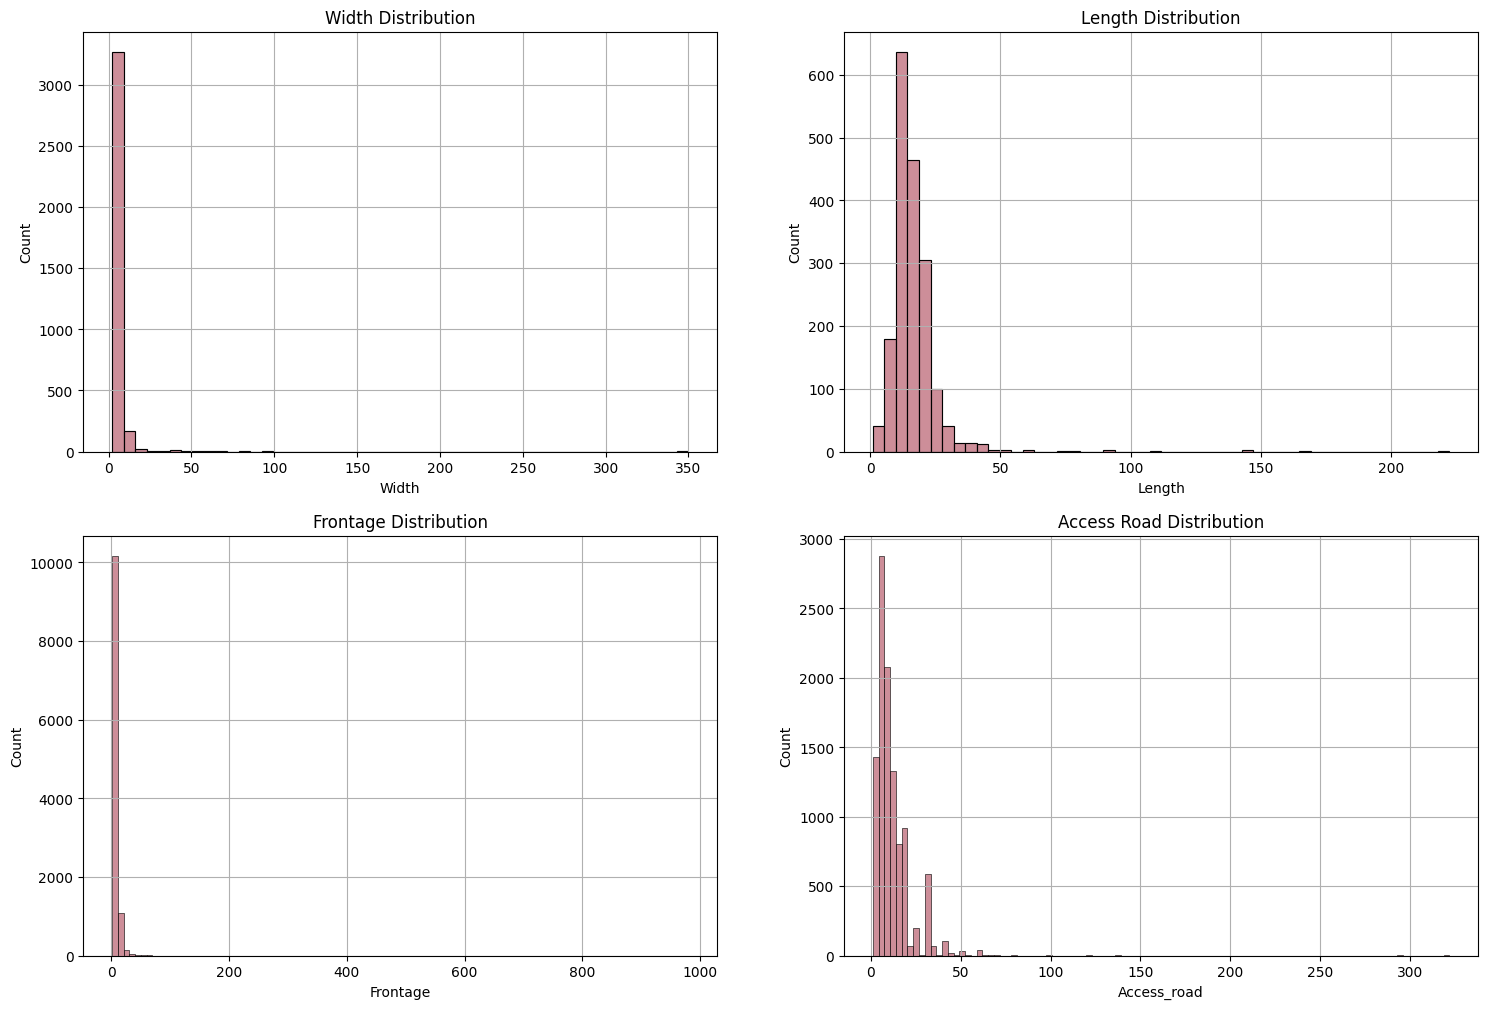

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.histplot(data=df, x="Width", color="#BD6877", bins=50, ax=axes[0, 0])
axes[0, 0].set_title("Width Distribution")

sns.histplot(data=df, x="Length", color="#BD6877", bins=50, ax=axes[0, 1])
axes[0, 1].set_title("Length Distribution")

sns.histplot(data=df, x="Frontage", color="#BD6877", bins=100, ax=axes[1, 0])
axes[1, 0].set_title("Frontage Distribution")

sns.histplot(data=df, x="Access_road", color="#BD6877", bins=100, ax=axes[1, 1])
axes[1, 1].set_title("Access Road Distribution")

plt.show()

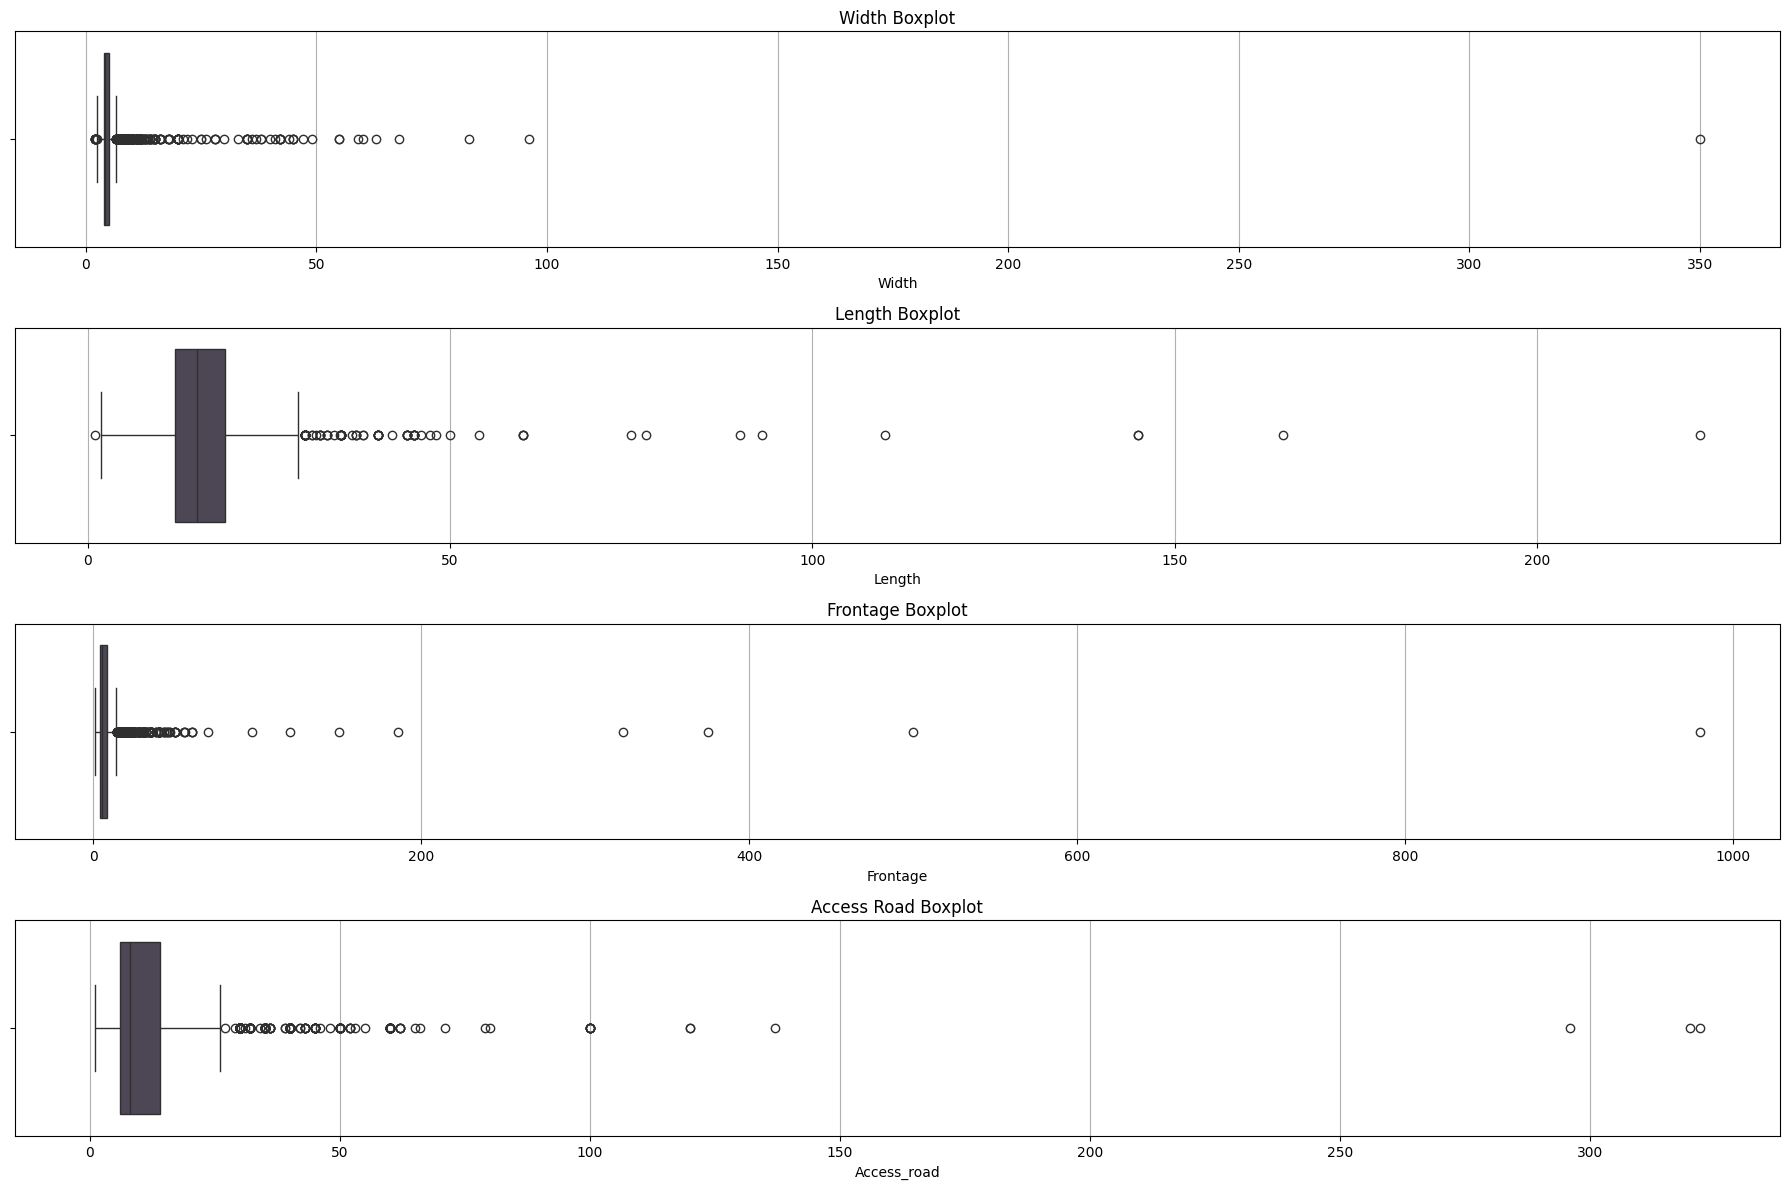

In [56]:
fig, axes = plt.subplots(4, 1, figsize=(18, 12))

sns.boxplot(data=df, x="Width", palette=custom_palette, ax=axes[0])
axes[0].set_title("Width Boxplot")

sns.boxplot(data=df, x="Length", palette=custom_palette, ax=axes[1])
axes[1].set_title("Length Boxplot")

sns.boxplot(data=df, x="Frontage", palette=custom_palette, ax=axes[2])
axes[2].set_title("Frontage Boxplot")

sns.boxplot(data=df, x="Access_road", palette=custom_palette, ax=axes[3])
axes[3].set_title("Access Road Boxplot")

plt.tight_layout()
plt.show()

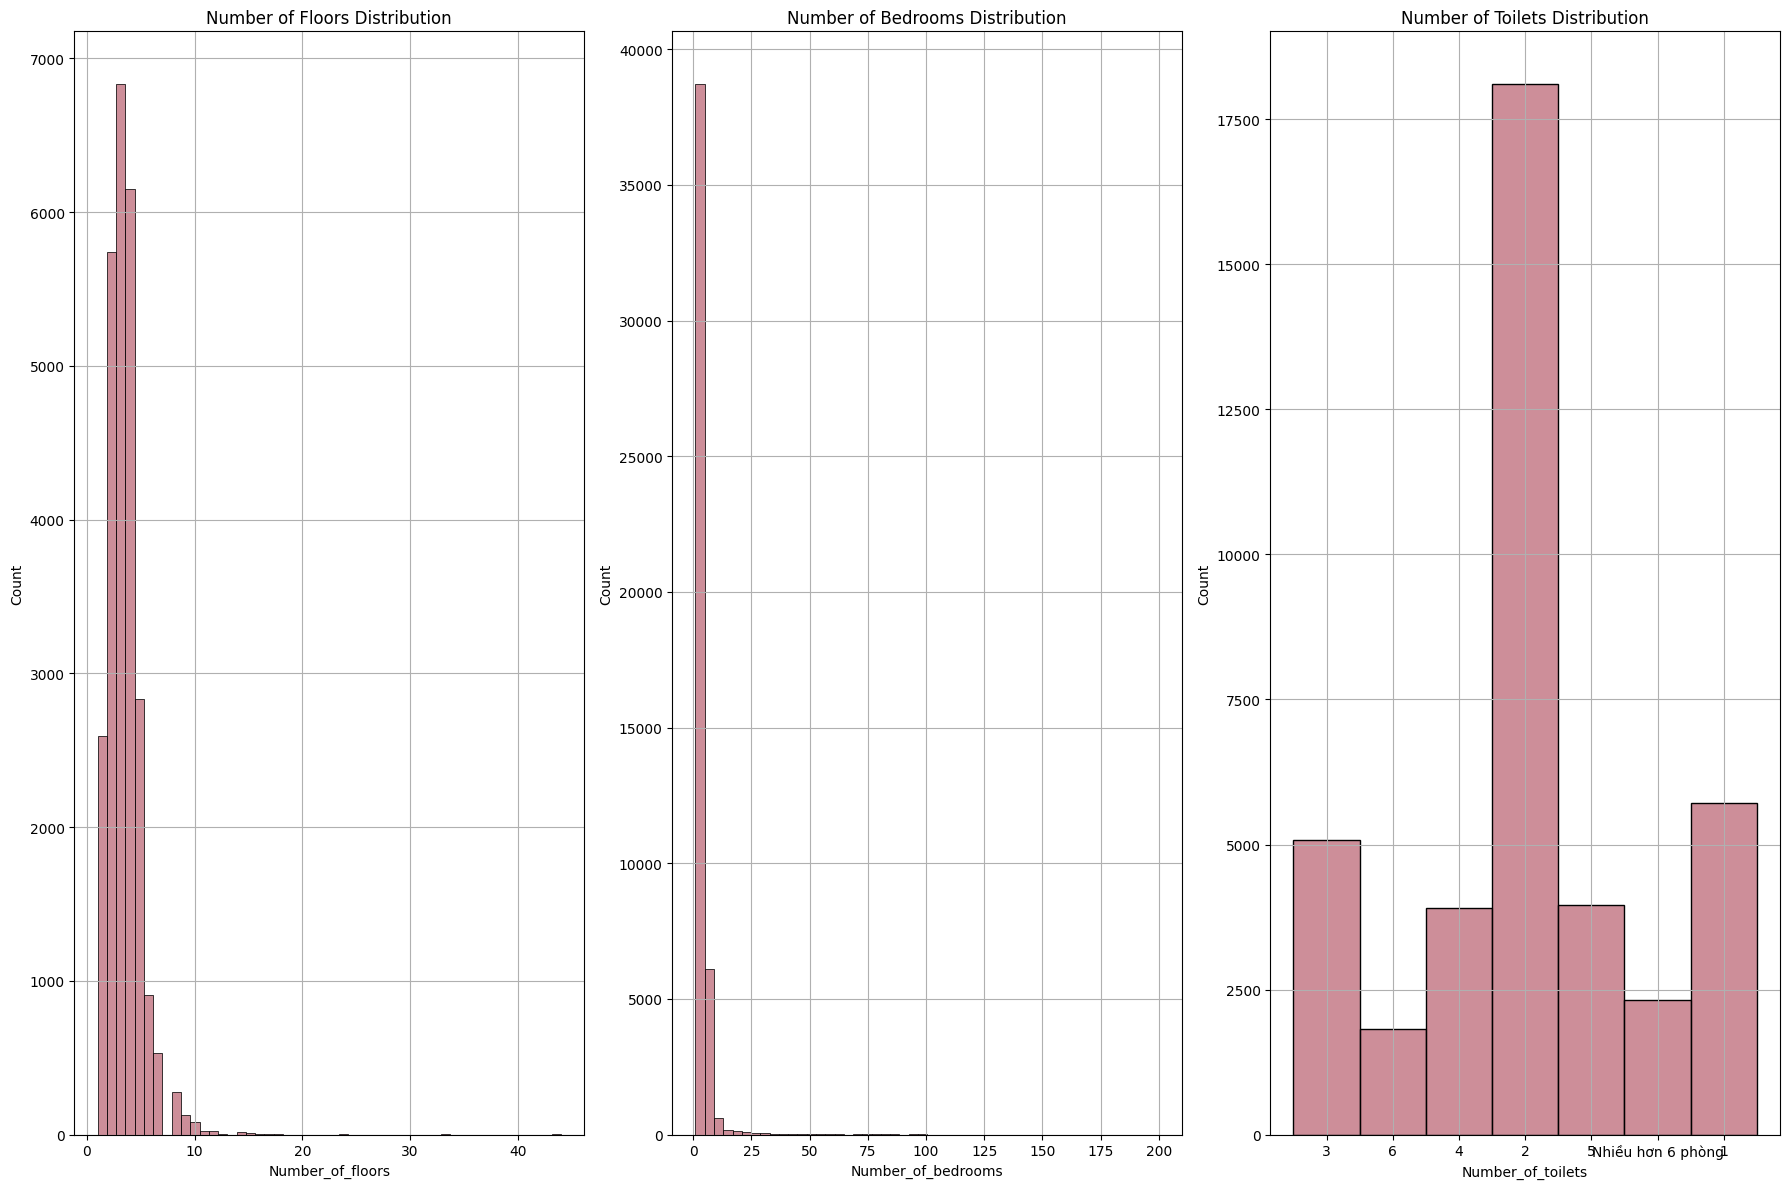

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(18, 12))

sns.histplot(data=df, x="Number_of_floors", color="#BD6877", bins=50, ax=axes[0])
axes[0].set_title("Number of Floors Distribution")

sns.histplot(data=df, x="Number_of_bedrooms", color="#BD6877", bins=50, ax=axes[1])
axes[1].set_title("Number of Bedrooms Distribution")

sns.histplot(data=df, x="Number_of_toilets", color="#BD6877", bins=100, ax=axes[2])
axes[2].set_title("Number of Toilets Distribution")

plt.tight_layout()
plt.show()

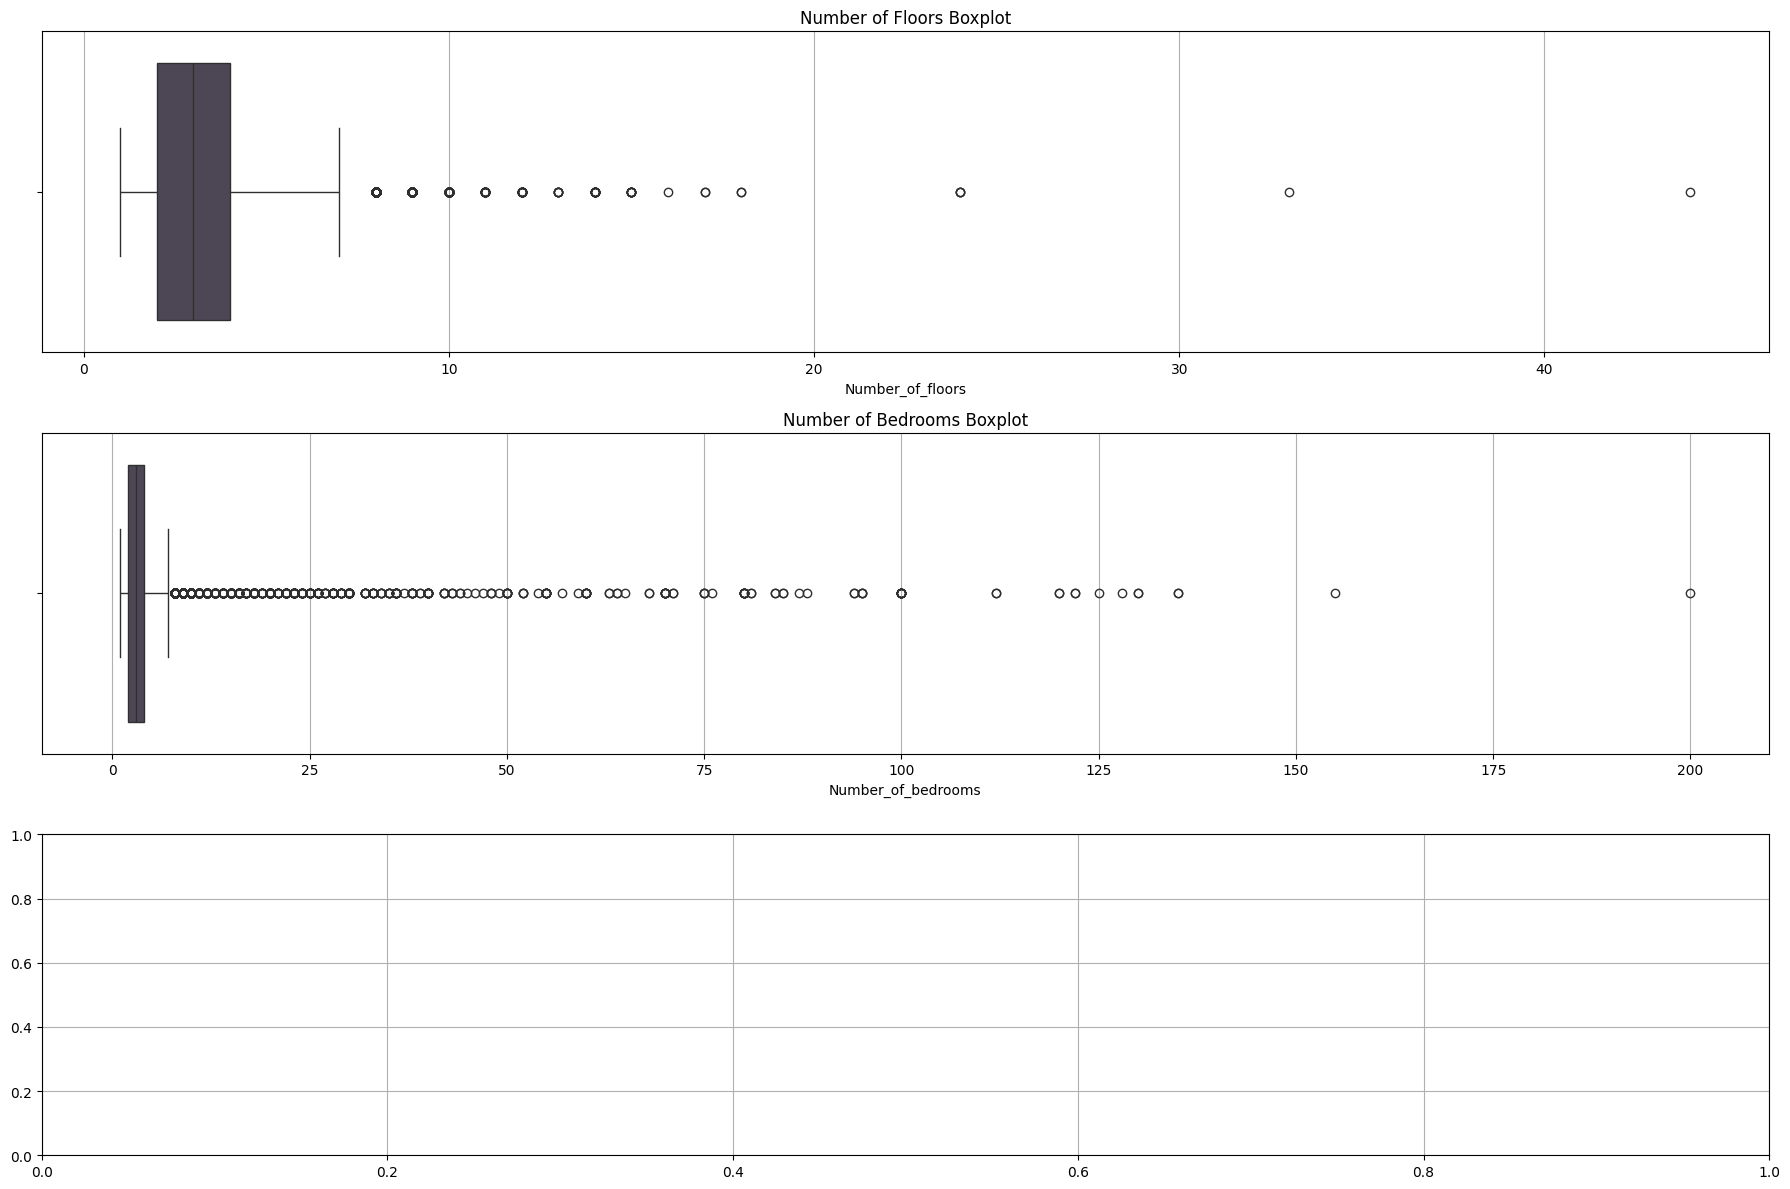

In [72]:
fig, axes = plt.subplots(3, 1, figsize=(18, 12))

sns.boxplot(data=df, x="Number_of_floors", palette=custom_palette, ax=axes[0])
axes[0].set_title("Number of Floors Boxplot")

sns.boxplot(data=df, x="Number_of_bedrooms", palette=custom_palette, ax=axes[1])
axes[1].set_title("Number of Bedrooms Boxplot")

#sns.boxplot(data=real_estate_df, x="Number_of_toilets", palette=custom_palette, ax=axes[2])
#axes[2].set_title("Number of Toilets Boxplot")

plt.tight_layout()
plt.show()

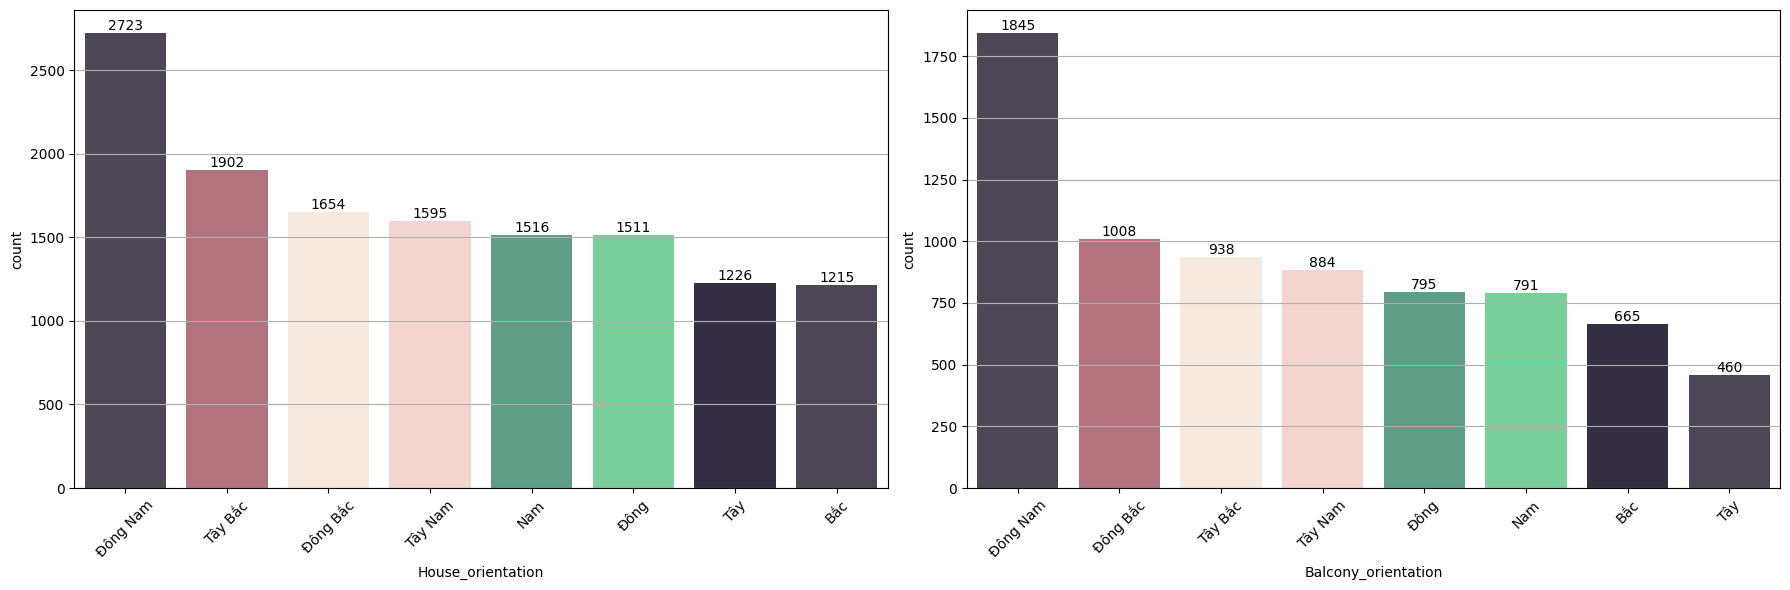

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(data=df, x="House_orientation",
              order=df["House_orientation"].value_counts().index,
              palette=custom_palette, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)  # Set rotation angle to 45 degrees

# Thêm số liệu cho mỗi cột trong biểu đồ
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

sns.countplot(data=df, x="Balcony_orientation", 
              order=df["Balcony_orientation"].value_counts().index,
              palette=custom_palette, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)  # Set rotation angle to 45 degrees

# Thêm số liệu cho mỗi cột trong biểu đồ
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

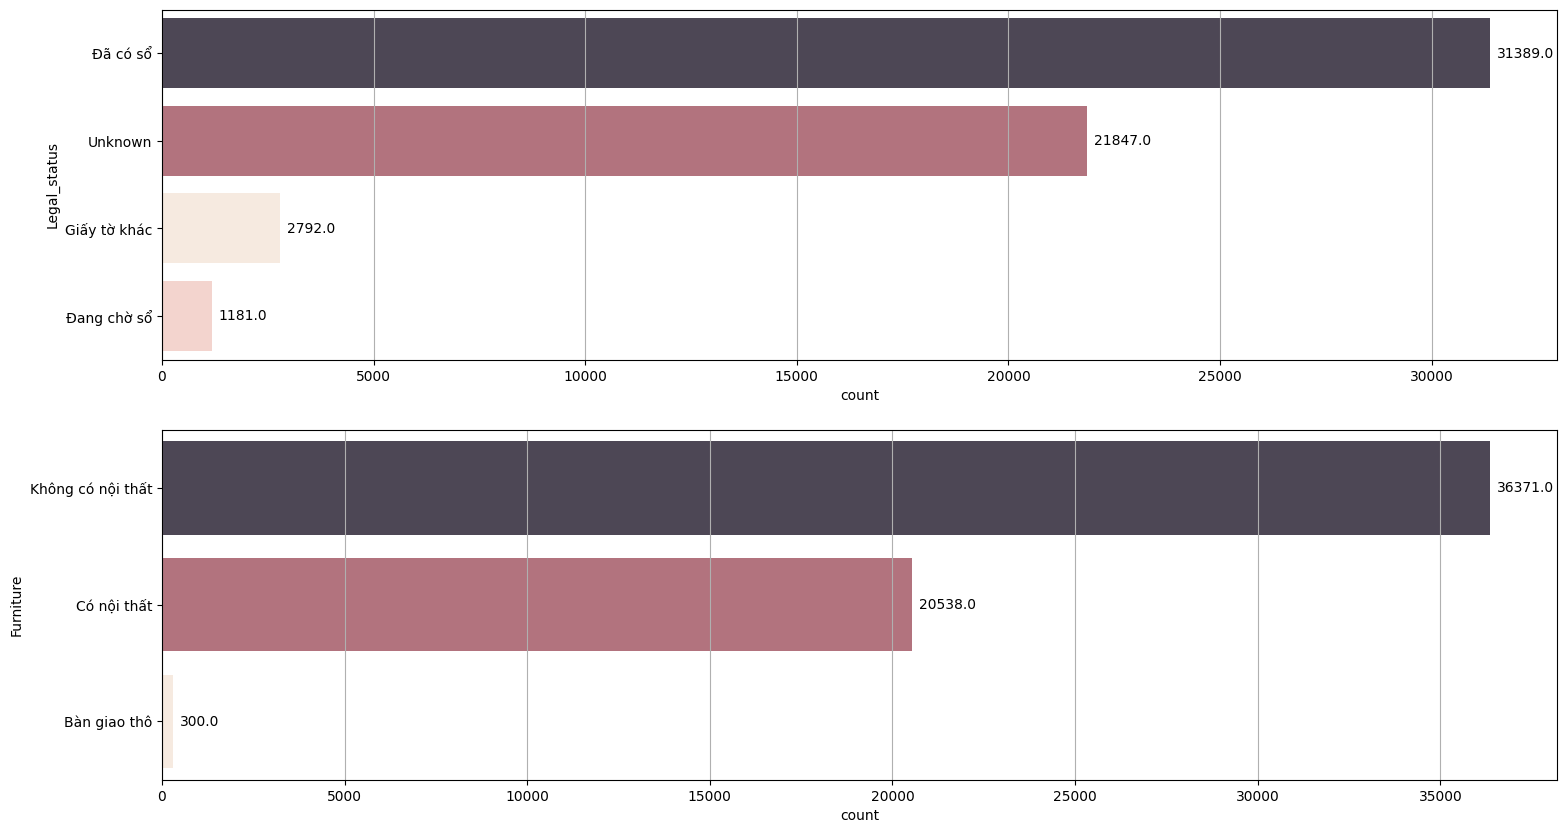

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
axes[0] = sns.countplot(data=df, y="Legal_status", 
                        order=df["Legal_status"].value_counts().index,
                        palette=custom_palette, ax = axes[0])

# Hiển thị giá trị trực tiếp trên các cột
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_width()}", (p.get_width(), p.get_y() + p.get_height()/2.), ha="left", va="center", xytext=(5, 0), textcoords="offset points")

axes[1] = sns.countplot(data=df, y="Furniture", 
                        order=df["Furniture"].value_counts().index, 
                        palette=custom_palette)

# Hiển thị giá trị trực tiếp trên các cột
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_width()}", (p.get_width(), p.get_y() + p.get_height()/2.), ha="left", va="center", xytext=(5, 0), textcoords="offset points")

# Hiển thị biểu đồ
plt.show()

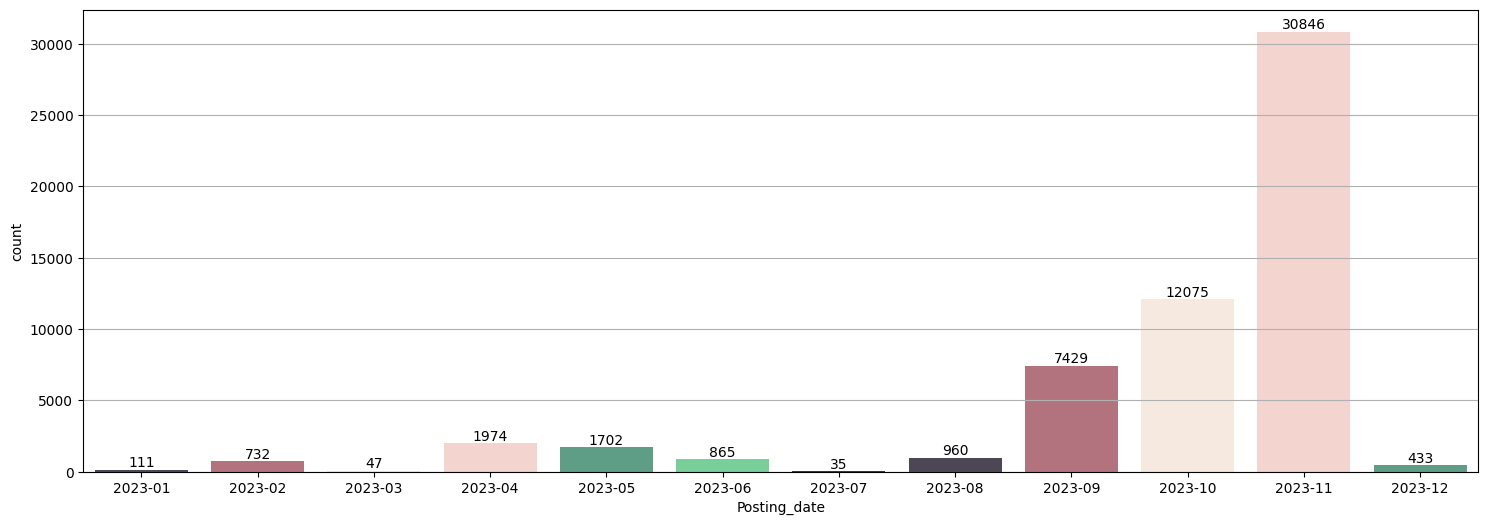

In [61]:
date = pd.to_datetime(df["Posting_date"], format="%d/%m/%Y")
Month = date.dt.to_period('M').sort_values()

plt.figure(figsize=(18, 6))
sns.countplot(x=Month, palette=custom_palette)

# Thêm số liệu cho mỗi cột trong biểu đồ
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

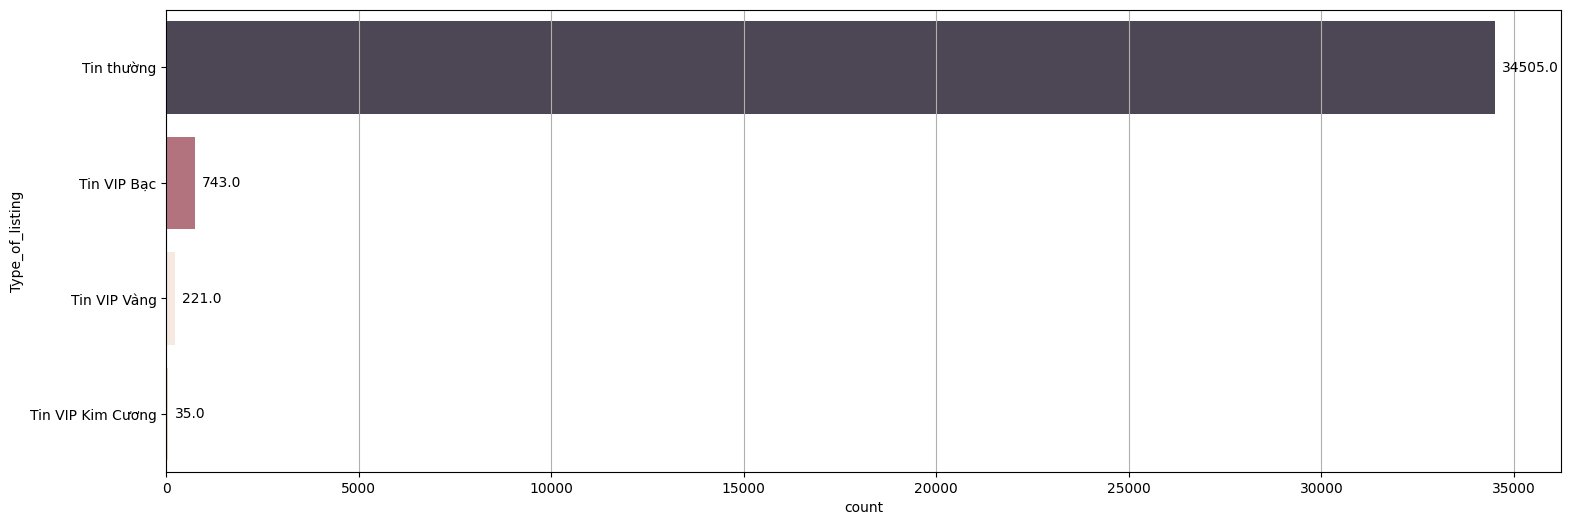

In [62]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(data=df, y="Type_of_listing", order=real_estate_df["Type_of_listing"].value_counts().index, palette=custom_palette)

# Hiển thị giá trị trực tiếp trên các cột
for p in ax.patches:
    ax.annotate(f"{p.get_width()}", (p.get_width(), p.get_y() + p.get_height()/2.), ha="left", va="center", xytext=(5, 0), textcoords="offset points")

# Hiển thị biểu đồ
plt.show()

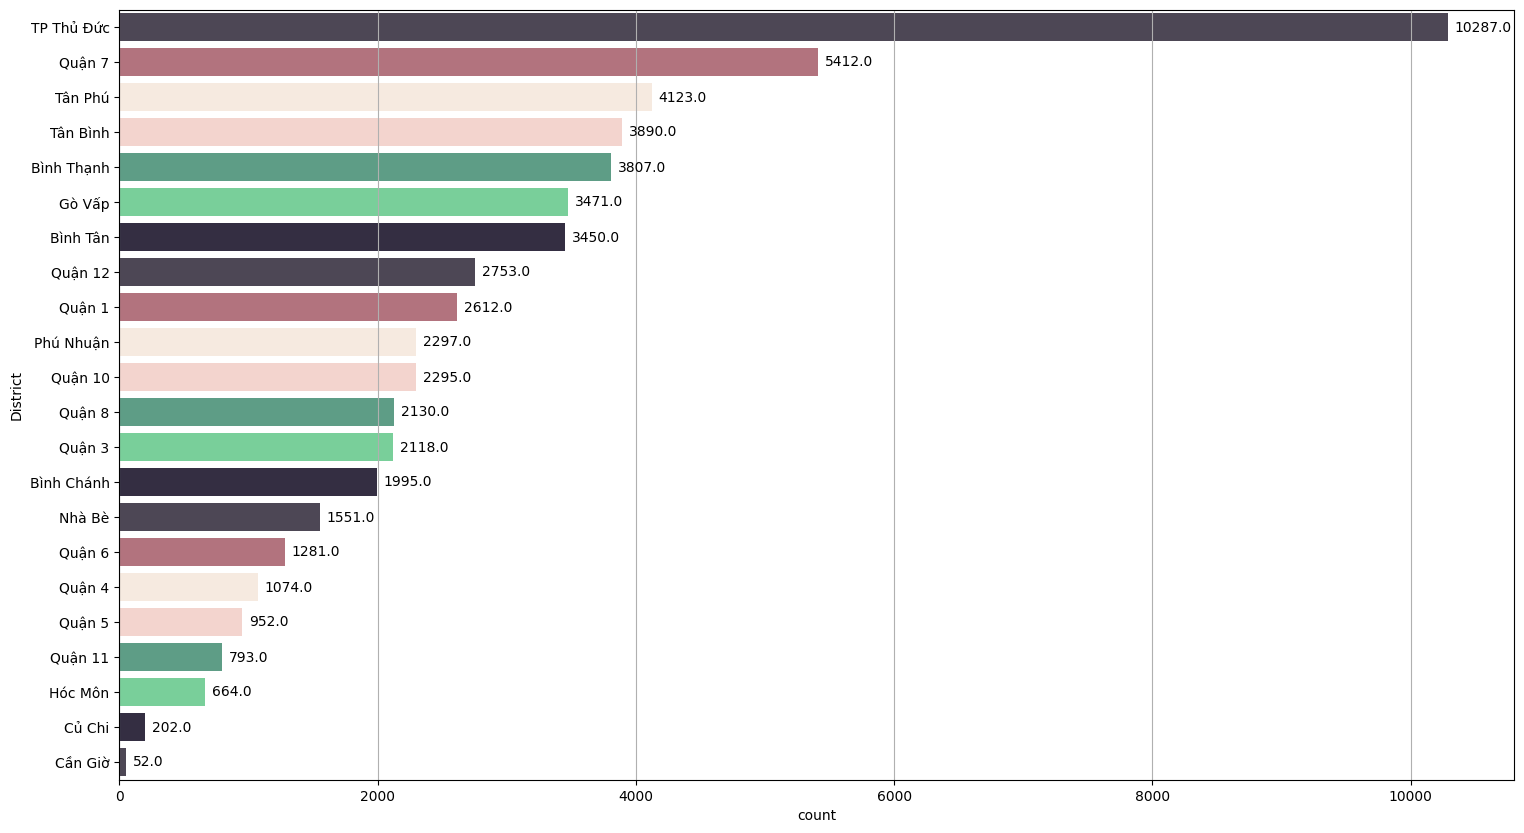

In [63]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(data=df, y="District", order=df["District"].value_counts().index, palette=custom_palette)
# Hiển thị giá trị trực tiếp trên các cột
for p in ax.patches:
    ax.annotate(f"{p.get_width()}", (p.get_width(), p.get_y() + p.get_height()/2.), ha="left", va="center", xytext=(5, 0), textcoords="offset points")

# Hiển thị biểu đồ
plt.show()

### Bivariable

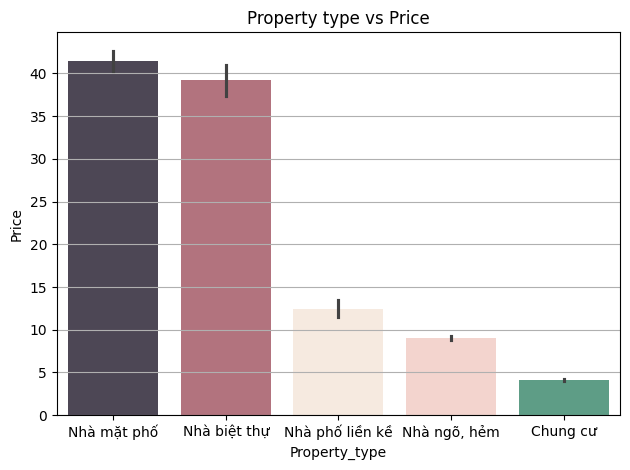

In [64]:
plt.title("Property type vs Price")
sns.barplot(data=df, x="Property_type", y="Price", order=df.groupby("Property_type")["Price"].mean().sort_values(ascending=False).index, palette=custom_palette)
plt.tight_layout()
plt.show()

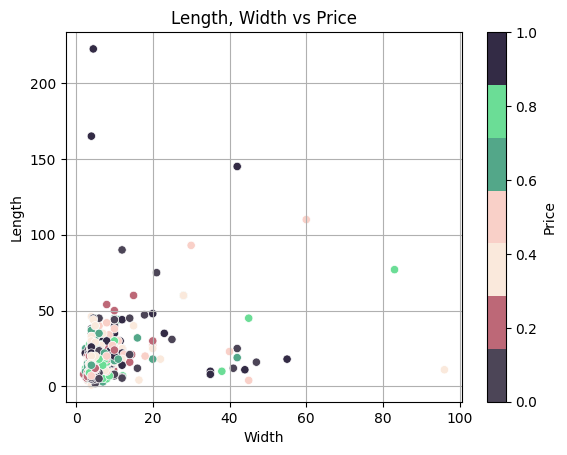

In [65]:
def scatter_p2(x, y):
    plt.title('Length, Width vs Price')
    scatter_plot = sns.scatterplot(data=df, x=x, y=y, hue="Price", palette=custom_palette, legend=False)
    
    # Tạo scatter plot trống để có mappable cho colorbar
    empty_scatter = plt.scatter([], [], c=[], cmap=custom_cmap)
    plt.colorbar(empty_scatter, label="Price")
    
    plt.show()

scatter_p2("Width", "Length")

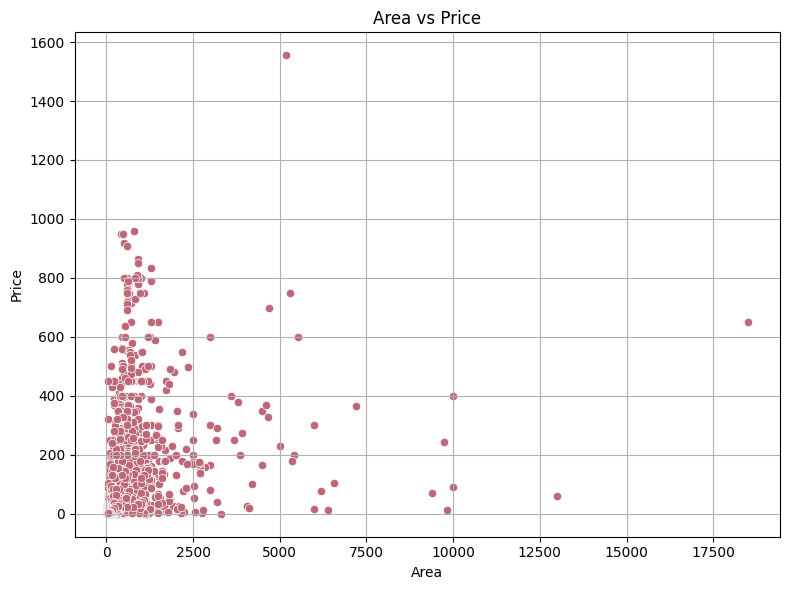

In [66]:
plt.figure(figsize=(8, 6))

plt.title('Area vs Price')
sns.scatterplot(data=df, x="Area", y="Price", color="#BD6877")
plt.xlabel('Area')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

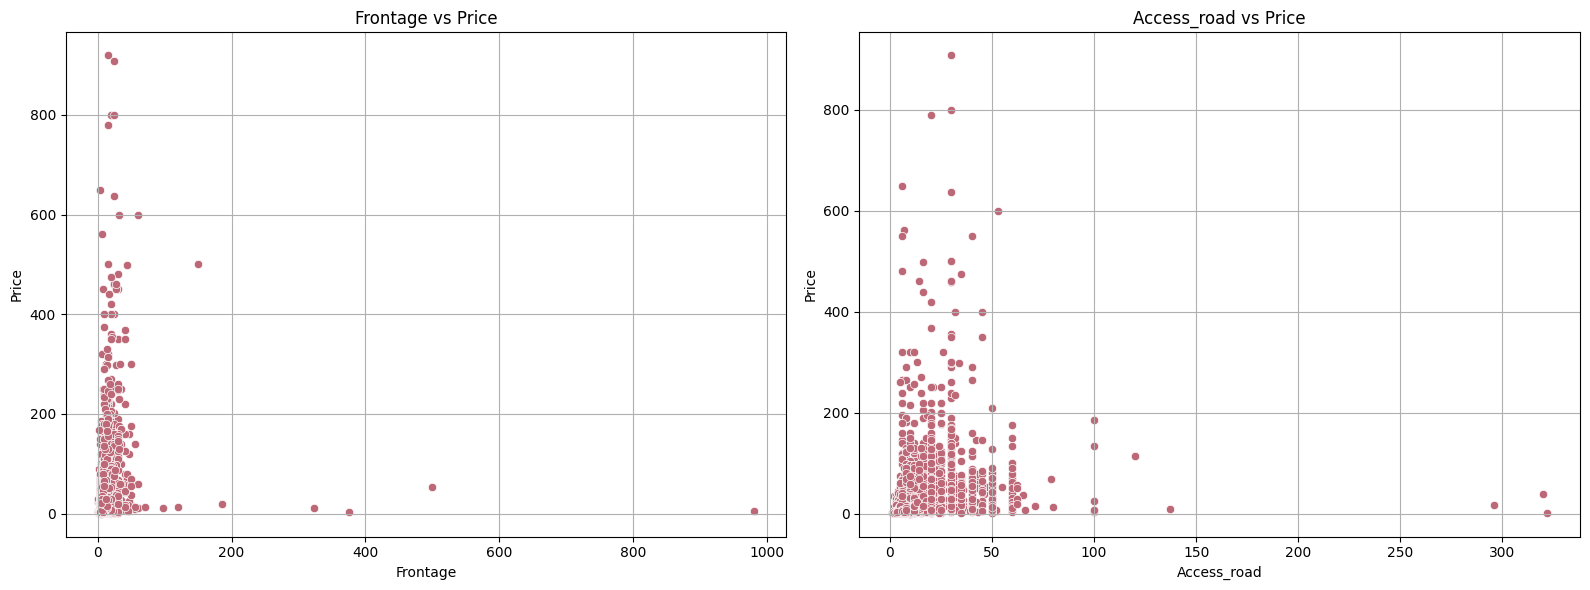

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Frontage vs Price
axes[0].set_title('Frontage vs Price')
sns.scatterplot(data=df, x="Frontage", y="Price", color="#BD6877", palette=custom_palette, ax=axes[0])
axes[0].set_xlabel('Frontage')
axes[0].set_ylabel('Price')

# Biểu đồ Access_road vs Price
axes[1].set_title('Access_road vs Price')
sns.scatterplot(data=df, x="Access_road", y="Price", color="#BD6877", palette=custom_palette, ax=axes[1])
axes[1].set_xlabel('Access_road')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

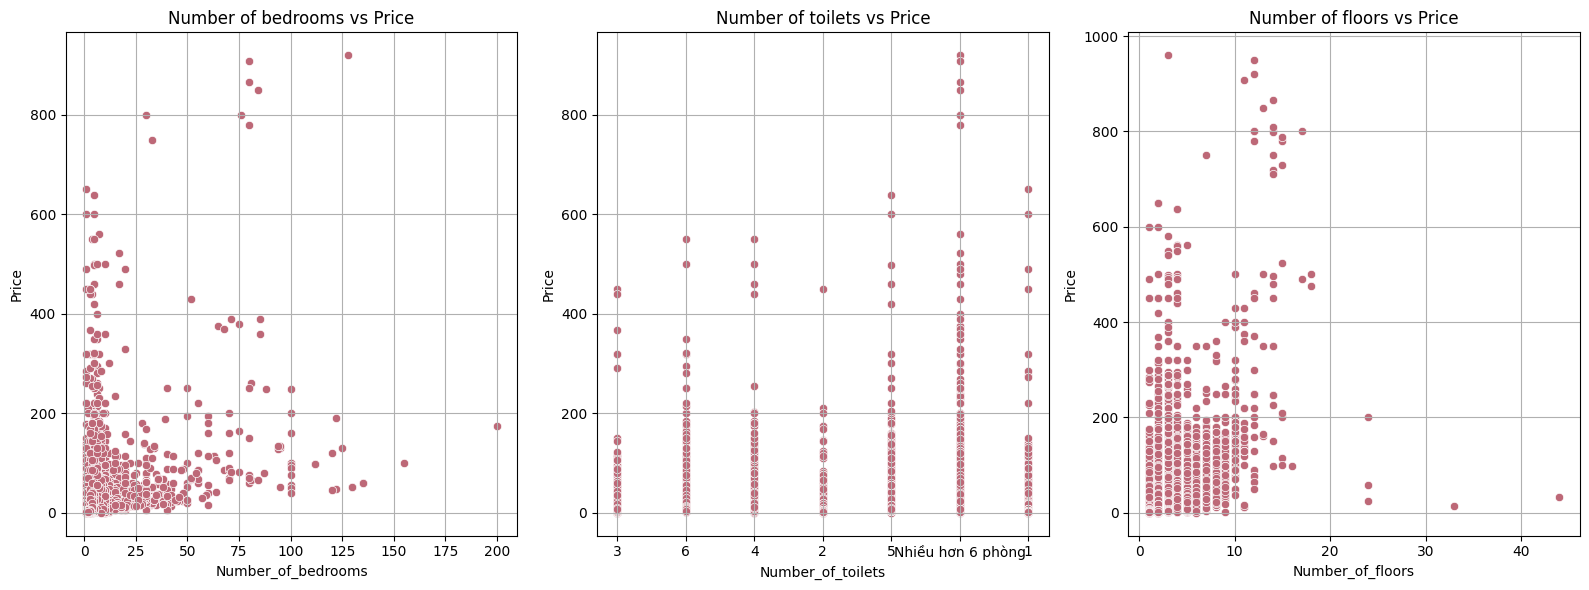

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Biểu đồ Number_of_bedrooms vs Price
axes[0].set_title('Number of bedrooms vs Price')
sns.scatterplot(data=df, x="Number_of_bedrooms", y="Price", color="#BD6877", palette=custom_palette, ax=axes[0])
axes[0].set_xlabel('Number_of_bedrooms')
axes[0].set_ylabel('Price')

# Biểu đồ Number_of_toilets vs Price
axes[1].set_title('Number of toilets vs Price')
sns.scatterplot(data=df, x="Number_of_toilets", y="Price", color="#BD6877", palette=custom_palette, ax=axes[1])
axes[1].set_xlabel('Number_of_toilets')
axes[1].set_ylabel('Price')

# Biểu đồ Number_of_floors vs Price
axes[2].set_title('Number of floors vs Price')
sns.scatterplot(data=df, x="Number_of_floors", y="Price", color="#BD6877", palette=custom_palette, ax=axes[2])
axes[2].set_xlabel('Number_of_floors')
axes[2].set_ylabel('Price')

plt.tight_layout()
plt.show()

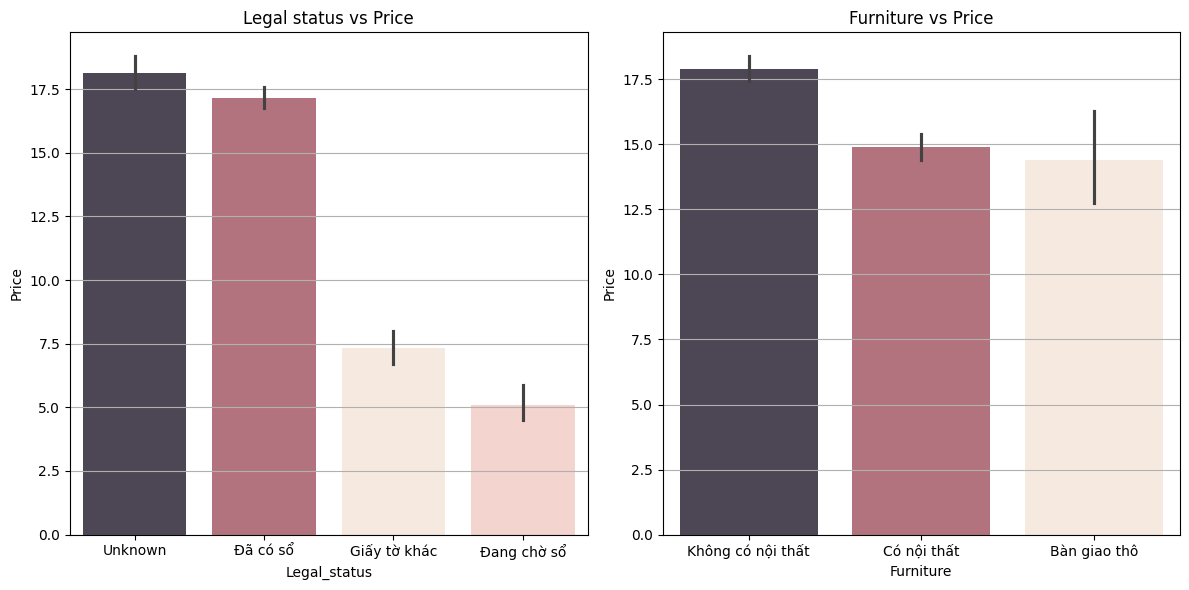

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ thứ nhất: Legal status vs Price
axes[0].set_title("Legal status vs Price")
order_legal_status = df.groupby("Legal_status")["Price"].mean().sort_values(ascending=False).index
sns.barplot(data=df, x="Legal_status", y="Price", order=order_legal_status, palette=custom_palette, ax=axes[0])

# Biểu đồ thứ hai: Furniture vs Price
axes[1].set_title("Furniture vs Price")
order_furniture = df.groupby("Furniture")["Price"].mean().sort_values(ascending=False).index
sns.barplot(data=df, x="Furniture", y="Price", order=order_furniture, palette=custom_palette, ax=axes[1])

# Tinh chỉnh giao diện
plt.tight_layout()

# Hiển thị hình ảnh chứa cả hai biểu đồ
plt.show()

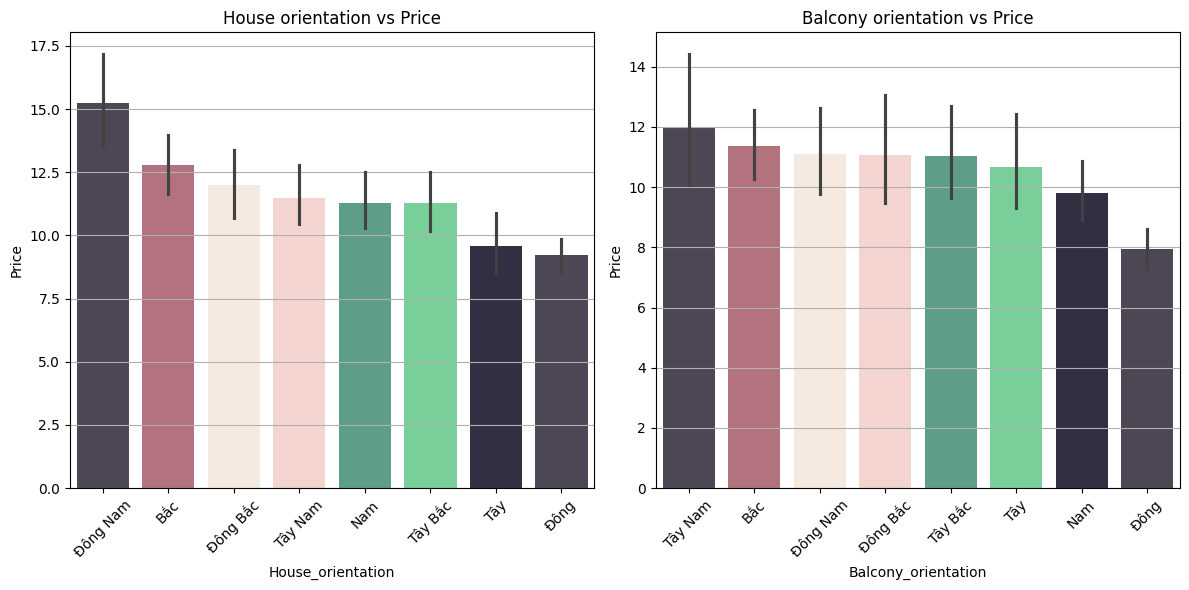

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ thứ nhất: House orientations vs Price
axes[0].set_title("House orientation vs Price")
sns.barplot(data=df, x="House_orientation", y="Price", palette=custom_palette, ax=axes[0], order=df.groupby("House_orientation")["Price"].mean().sort_values(ascending=False).index)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Biểu đồ thứ hai: Balcony orientation vs Price
axes[1].set_title("Balcony orientation vs Price")
sns.barplot(data=df, x="Balcony_orientation", y="Price", palette=custom_palette, ax=axes[1], order=df.groupby("Balcony_orientation")["Price"].mean().sort_values(ascending=False).index)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Tinh chỉnh giao diện
plt.tight_layout()

# Hiển thị hình ảnh chứa cả hai biểu đồ
plt.show()

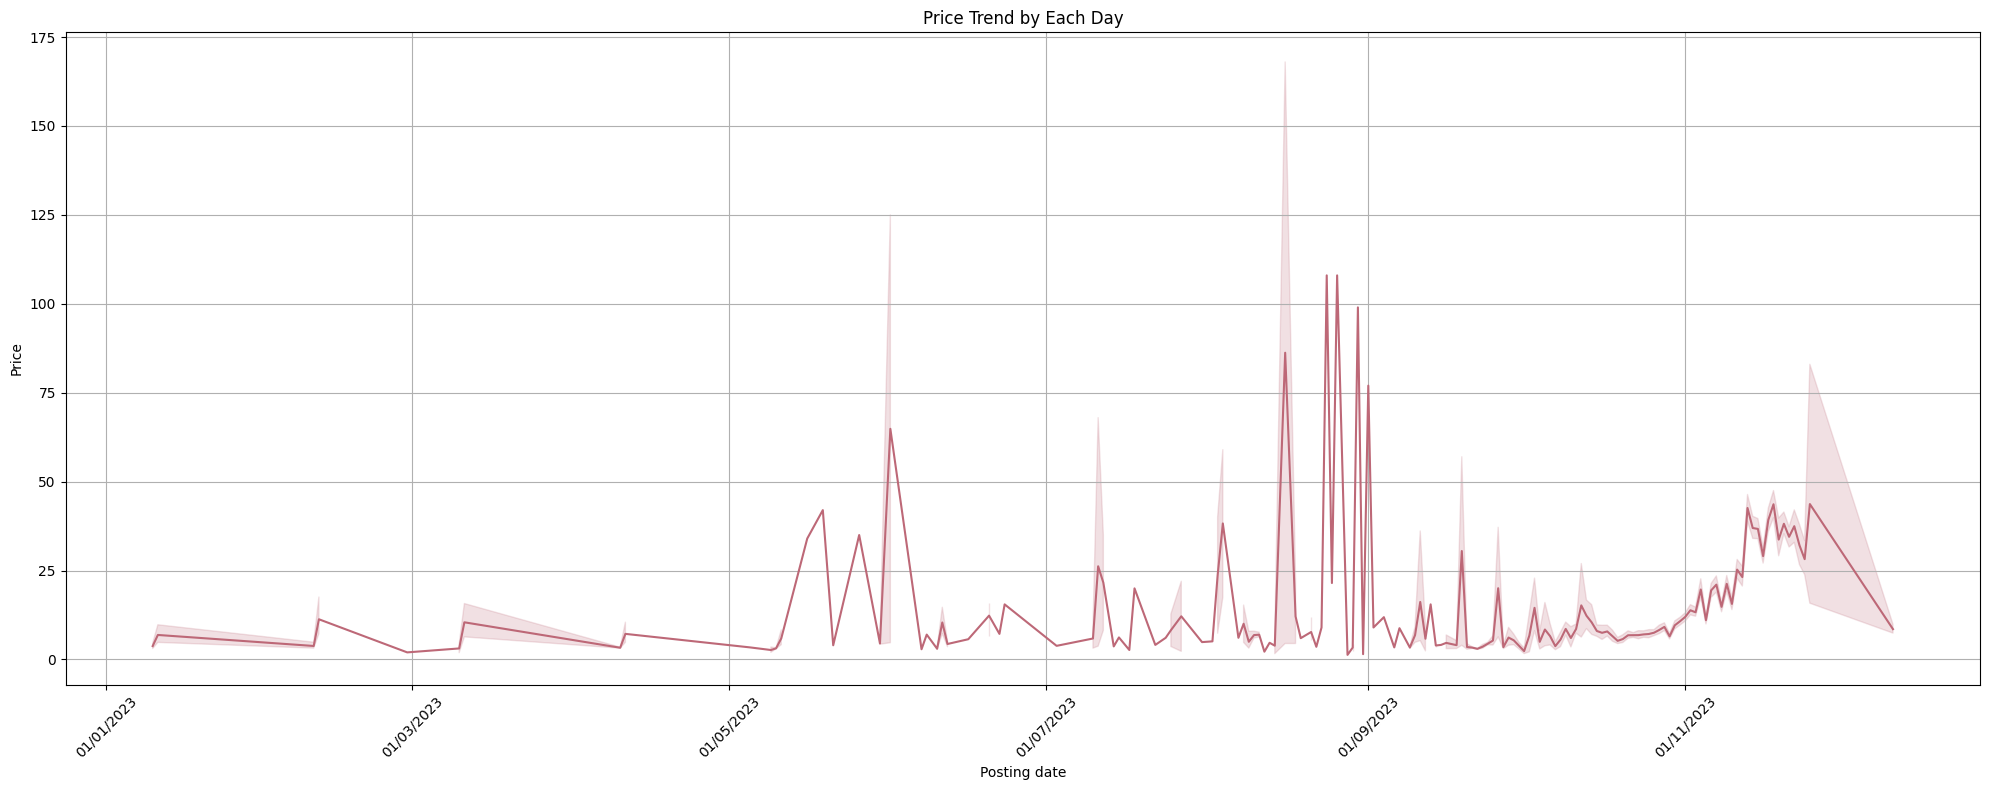

In [71]:
import matplotlib.dates as mdates

df_sorted = df.sort_values("Posting_date")
date = pd.to_datetime(df_sorted["Posting_date"], format="%d/%m/%Y")

plt.figure(figsize=(20, 8))
sns.lineplot(x=date, y=df_sorted["Price"], color="#BD6877")
plt.xlabel("Posting date")
plt.ylabel("Price")
plt.title("Price Trend by Each Day")
plt.xticks(rotation=45)

# Định dạng ngày tháng trên trục x
date_format = mdates.DateFormatter("%d/%m/%Y")
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

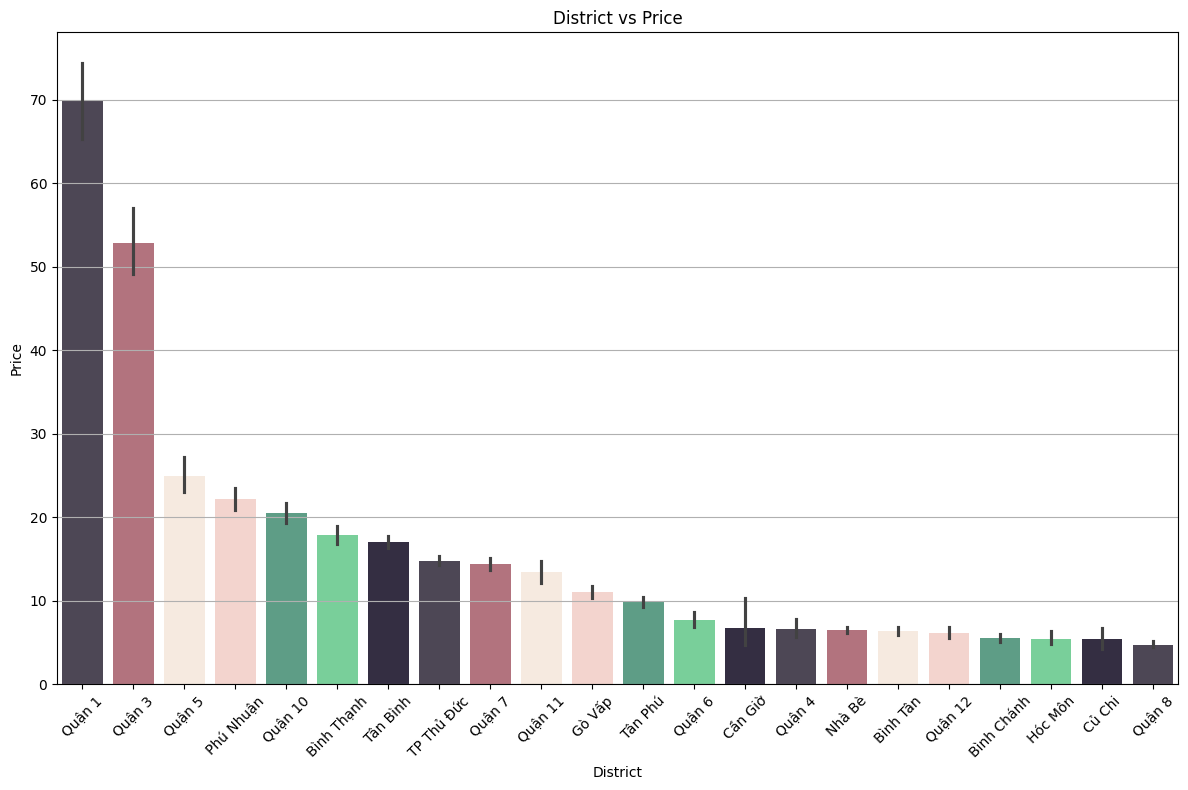

In [72]:
plt.figure(figsize=(12, 8))
plt.title("District vs Price")
sns.barplot(data=df, x="District", y="Price", order=df.groupby("District")["Price"].mean().sort_values(ascending=False).index, palette=custom_palette)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Data Preprocessing:

In [62]:
df1 = real_estate_df.copy()
df1.head()

,Property_type,Area,Width,Length,Frontage,Number_of_floors,Number_of_bedrooms,Number_of_toilets,Legal_status,Furniture,...,Access_road,Posting_date,Expiry_date,Type_of_listing,Project_name,Street,Ward,District,Province,Price
0,Nhà biệt thự,196.0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Không có nội thất,...,NaN,4/11/2023,11/11/2023,Tin VIP Kim Cương,Dự án Camellia Garden,Đường Nguyễn Văn Linh,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,18.0
1,Nhà biệt thự,196.0,NaN,NaN,10.0,1.0,3.0,3,Giấy tờ khác,Không có nội thất,...,10.0,4/11/2023,11/11/2023,Tin VIP Bạc,Dự án Camellia Garden,Đường Nguyễn Văn Linh,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,18.0
2,Nhà biệt thự,282.0,NaN,NaN,NaN,2.0,4.0,6,Đã có sổ,Có nội thất,...,16.0,1/11/2023,11/11/2023,Tin VIP Bạc,Unknown,Đường số 2,Xã Tân Kiên,Bình Chánh,TP Hồ Chí Minh,21.0
3,Nhà biệt thự,80.0,NaN,NaN,NaN,3.0,4.0,3,Đã có sổ,Có nội thất,...,NaN,1/11/2023,16/11/2023,Tin thường,Dự án Lovera Park,Đường Trịnh Quang Nghị,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,6.5
4,Nhà biệt thự,337.5,NaN,NaN,15.0,3.0,5.0,6,Đã có sổ,Có nội thất,...,18.0,31/10/2023,7/11/2023,Tin VIP Bạc,Dự án Đại Phúc Green Villas,Đường Phạm Hùng,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,38.0


In [63]:
colsToRemove = ['Width', 'Length']
df1.drop(colsToRemove, inplace=True, axis=1)
df1.head()

,Property_type,Area,Frontage,Number_of_floors,Number_of_bedrooms,Number_of_toilets,Legal_status,Furniture,House_orientation,Balcony_orientation,Access_road,Posting_date,Expiry_date,Type_of_listing,Project_name,Street,Ward,District,Province,Price
0,Nhà biệt thự,196.0,NaN,NaN,NaN,NaN,Unknown,Không có nội thất,NaN,NaN,NaN,4/11/2023,11/11/2023,Tin VIP Kim Cương,Dự án Camellia Garden,Đường Nguyễn Văn Linh,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,18.0
1,Nhà biệt thự,196.0,10.0,1.0,3.0,3,Giấy tờ khác,Không có nội thất,Tây Nam,Nam,10.0,4/11/2023,11/11/2023,Tin VIP Bạc,Dự án Camellia Garden,Đường Nguyễn Văn Linh,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,18.0
2,Nhà biệt thự,282.0,NaN,2.0,4.0,6,Đã có sổ,Có nội thất,Tây Bắc,Tây,16.0,1/11/2023,11/11/2023,Tin VIP Bạc,Unknown,Đường số 2,Xã Tân Kiên,Bình Chánh,TP Hồ Chí Minh,21.0
3,Nhà biệt thự,80.0,NaN,3.0,4.0,3,Đã có sổ,Có nội thất,NaN,NaN,NaN,1/11/2023,16/11/2023,Tin thường,Dự án Lovera Park,Đường Trịnh Quang Nghị,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,6.5
4,Nhà biệt thự,337.5,15.0,3.0,5.0,6,Đã có sổ,Có nội thất,Đông Bắc,Đông Bắc,18.0,31/10/2023,7/11/2023,Tin VIP Bạc,Dự án Đại Phúc Green Villas,Đường Phạm Hùng,Xã Bình Hưng,Bình Chánh,TP Hồ Chí Minh,38.0
